<a href="https://colab.research.google.com/github/rojinebrahimi/fastai/blob/master/pen_pencil_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
# urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
# window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [0]:
folder = 'pen'
file = 'pens.txt'

In [0]:
folder = 'pencil'
file = 'pencils.txt'

In [0]:
path = Path('data/write')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('.config'),
 PosixPath('drive'),
 PosixPath('pencils'),
 PosixPath('pen'),
 PosixPath('sample_data')]

In [0]:
classes = ['pen', 'pencil']

In [11]:
download_images(path/folder/file, dest, max_pics=250)

In [14]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

pen


pencil


In [0]:
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [16]:
len(data.classes), data.c

(2, 2)

In [17]:
data.classes

['pen', 'pencil']

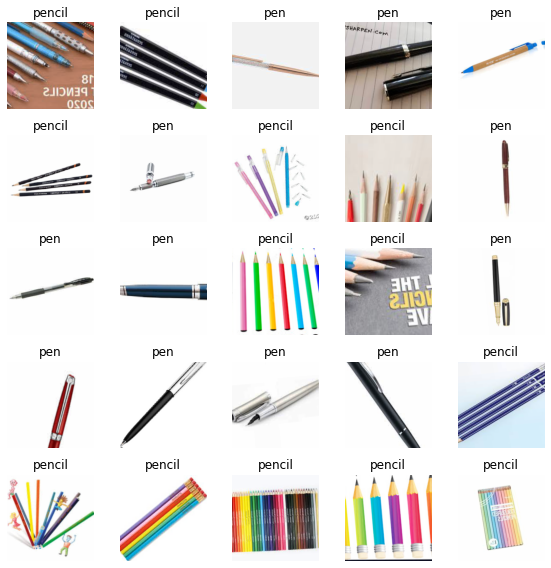

In [18]:
data.show_batch(row=5, figsize=(8, 8))

In [19]:
len(data.train_ds), len(data.valid_ds)

(128, 32)

In [20]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [21]:
learn.fit_one_cycle(7)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.427954,0.812898,0.781250,0.218750,00:02
1,1.032297,0.930761,0.875000,0.125000,00:01
2,0.774454,1.083832,0.906250,0.093750,00:01
3,0.638031,0.981015,0.937500,0.062500,00:01
4,0.520277,0.857331,0.937500,0.062500,00:01
5,0.436064,0.763893,0.937500,0.062500,00:01
6,0.411517,0.691122,0.937500,0.062500,00:01


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


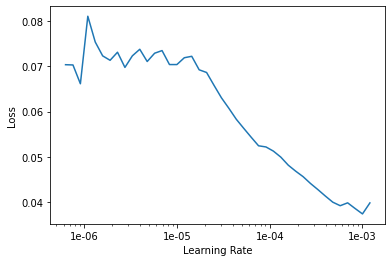

In [25]:
learn.recorder.plot()

In [34]:
learn.load('stage-1')
learn.fit_one_cycle(7, max_lr=1e-05)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.075083,0.618765,0.937500,0.062500,00:01
1,0.056366,0.576158,0.937500,0.062500,00:01
2,0.047614,0.550229,0.937500,0.062500,00:01
3,0.047509,0.537438,0.937500,0.062500,00:01
4,0.043669,0.523679,0.937500,0.062500,00:01
5,0.042363,0.512188,0.937500,0.062500,00:01
6,0.048303,0.500184,0.937500,0.062500,00:01


In [0]:
learn.save('stage-2')

In [36]:
learn.load('stage-2')
interp = ClassificationInterpretation.from_learner(learn)

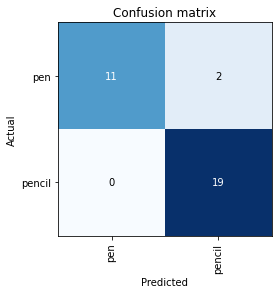

In [37]:
interp.plot_confusion_matrix()

32 misclassified samples over 32 samples in the validation set.


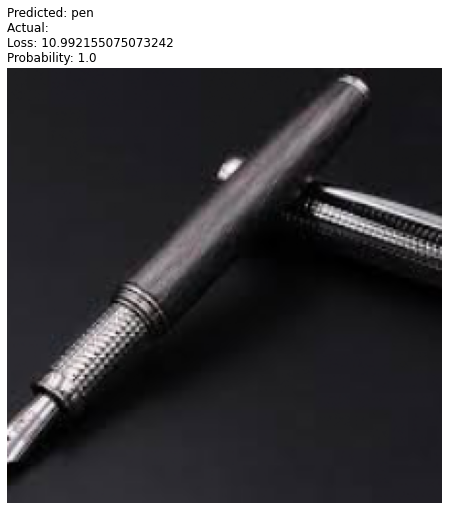

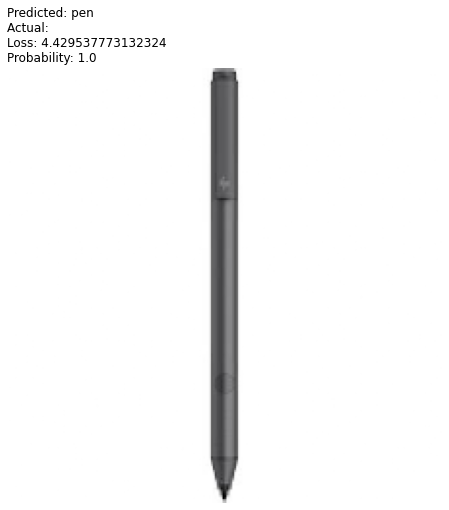

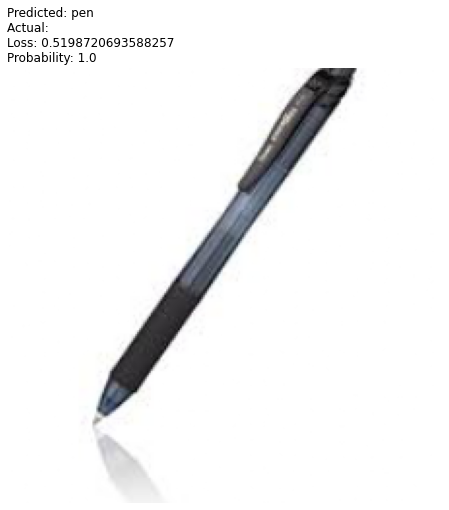

In [38]:
interp.plot_multi_top_losses()

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

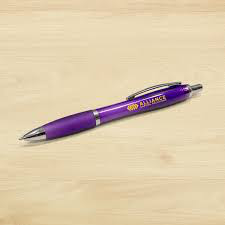

In [42]:
image = open_image(path/'pen'/'00000017.jpg')
image

In [0]:
learn = load_learner(path)

In [0]:
pred_class, indx, outputs = learn.predict(image)

In [52]:
pred_class

Category pen